<a href="https://colab.research.google.com/github/mifm/examples/blob/master/MAP_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install git+https://github.com/WISDEM/pyMAP.git

In [0]:
%%capture
!git clone https://github.com/WISDEM/pyMAP.git


Here is the linearized stiffness matrix with zero vessel displacement:
[[      70734.9           0.1          27.8          -1.8     -109402.4          -0.7]
 [         -0.3       70735.0           0.0      108836.5        -848.4          -2.2]
 [          0.0          -0.3       19074.5         845.5          -0.1           4.7]
 [         11.7      109682.8          -0.2    87420100.4        -374.9         -39.3]
 [    -109788.4        -181.4          70.4         133.9    87420127.2          29.2]
 [        281.1          -2.2        -187.9         -37.1          34.8   117254884.3]]
Line 0: H = 909702.67 [N]  V = 631914.80 [N]
Line 0: Fx = -454851.41 [N]  Fy = -787825.58 [N]  Fz = 631914.80 [N]
Line 0: H = -651447.48 [N]  V = -0.00 [N]
Line 0: Fx = 325723.79 [N]  Fy = 564170.03 [N]  Fz = -0.00 [N]


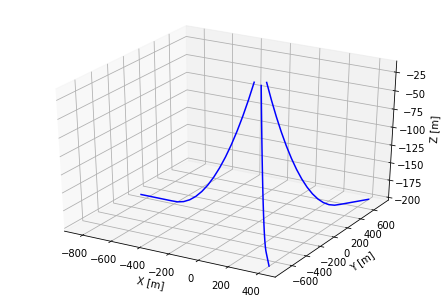

In [8]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-


#   Copyright (C) 2014 mdm                                     
#   map[dot]plus[dot]plus[dot]help[at]gmail                     
#                                                              
# Licensed to the Apache Software Foundation (ASF) under one   
# or more contributor license agreements.  See the NOTICE file 
# distributed with this work for additional information        
# regarding copyright ownership.  The ASF licenses this file   
# to you under the Apache License, Version 2.0 (the            
# "License"); you may not use this file except in compliance   
# with the License.  You may obtain a copy of the License at   
#                                                              
#   http://www.apache.org/licenses/LICENSE-2.0                 
#                                                              
# Unless required by applicable law or agreed to in writing,   
# software distributed under the License is distributed on an  
# "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY       
# KIND, either express or implied.  See the License for the    
# specific language governing permissions and limitations            
# under the License.                                             


from pymap import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
np.set_printoptions(formatter={'float': '{: 13.1f}'.format},linewidth=100)

mooring_1 = pyMAP( )

mooring_1.map_set_sea_depth(320)
mooring_1.map_set_gravity(9.81)
mooring_1.map_set_sea_density(1025.0)

# mooring_1.read_file("input.map")                                         # 350 m depth        
# mooring_1.read_file("inwind_new.map")
# mooring_1.read_file("../test/test_for_nrel.map")
# mooring_1.read_file("../test/baseline_1.map")                                        # 120 m depth    
# mooring_1.read_file("../test/baseline_2.map")                                       # 350 m depth    
# mooring_1.read_file("../test/baseline_5.map")                                       # 80 m depth
# mooring_1.read_file("../test/NRELOffshrBsline5MW_Platform_OC3Hywind.map")           # 320 m depth
# mooring_1.read_file("../test/NRELOffshrBsline5MW_Platform_OC3Hywind_segmented.map")   # 320 m depth
mooring_1.read_file("pyMAP/test/NRELOffshrBsLine5MW_OC4.map")                            # 200 m depth
# mooring_1.read_file("../test/NRELOffshrBsLine5MW_TLP.map")                          # 200 m depth

# mooring_1.summary_file('name_me.txt')
mooring_1.init( )

epsilon = 1e-5
K = mooring_1.linear(epsilon)    
print("\nHere is the linearized stiffness matrix with zero vessel displacement:")
print(np.array(K))

H,V = mooring_1.get_fairlead_force_2d(0)    
print("Line %d: H = %2.2f [N]  V = %2.2f [N]"%(0, H, V))
  
fx,fy,fz = mooring_1.get_fairlead_force_3d(0)    
print("Line %d: Fx = %2.2f [N]  Fy = %2.2f [N]  Fz = %2.2f [N]"%(0, fx, fy, fz))

H,V = mooring_1.get_anchor_force_2d(0)    
print("Line %d: H = %2.2f [N]  V = %2.2f [N]"%(0, H, V))
  
fx,fy,fz = mooring_1.get_anchor_force_3d(0)    
print("Line %d: Fx = %2.2f [N]  Fy = %2.2f [N]  Fz = %2.2f [N]"%(0, fx, fy, fz))

#mooring_1.displace_vessel(5,0,0,0,0,0)
#mooring_1.update_states(0.0,0)

#mooring_1.displace_vessel(17,0,0,0,0,0)
#mooring_1.update_states(0.0,0)

# H,V = mooring_1.get_fairlead_force_2d(0)    
# print(H, "  ", V)
  
# fx,fy,fz = mooring_1.get_fairlead_force_3d(0)    
# print(fx, "  ", fy, "  ", fz)
# 
# ''' 
# function residual at (hopefully) the solution
# '''
# 
# print(mooring_1.funch(0))
# print(mooring_1.funcl(0))
# 
# '''
# derivatives at solution
# '''
# print(mooring_1.dxdh(0))
# print(mooring_1.dxdv(0))   
# print(mooring_1.dzdh(0))
# print(mooring_1.dzdv(0))
# 
# print(mooring_1.dxdh(1))
# print(mooring_1.dxdv(1))   
# print(mooring_1.dzdh(1))
# print(mooring_1.dzdv(1))

fig = plt.figure()
ax = Axes3D(fig)
for i in range(0,mooring_1.size_lines()):
    x = mooring_1.plot_x( i, 20 )
    y = mooring_1.plot_y( i, 20 )
    z = mooring_1.plot_z( i, 20 )        
    ax.plot(x,y,z,'b-')
  
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')        
#ax.set_xlim([-3.0,3])        
#ax.set_ylim([-3.0,3])        
#ax.set_zlim([-3.0,0])        
  
plt.show()

mooring_1.end( )


In [9]:
6*7

42

In [11]:
pwd

'/content'